In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os 
import sys
sns.set_theme()

In [2]:
base_path = 'data'
gru_base_path = os.path.join(base_path, 'gru', 'gru_') 
lstm_base_path = os.path.join(base_path, 'lstm', 'lstm_') 
tra_base_path = os.path.join(base_path, 'tra', 'tra_')
baseline_path = os.path.join(base_path, 'baseline.csv')
variations = ['4', '8', '16', '8_R', '16_R']
gru_data_paths = [baseline_path] + [gru_base_path+variation+'.csv' for variation in variations]
lstm_data_paths = [baseline_path] + [lstm_base_path+variation+'.csv' for variation in variations]
tra_data_paths = [baseline_path] + [tra_base_path+variation+'.csv' for variation in variations] 
all_paths = gru_data_paths + lstm_data_paths + tra_data_paths
for path in all_paths:
    if os.path.exists(path):
        print(path, 'EXISTS')
    else:
        print(path, 'NOT EXISTS')

data\baseline.csv EXISTS
data\gru\gru_4.csv EXISTS
data\gru\gru_8.csv EXISTS
data\gru\gru_16.csv EXISTS
data\gru\gru_8_R.csv EXISTS
data\gru\gru_16_R.csv EXISTS
data\baseline.csv EXISTS
data\lstm\lstm_4.csv EXISTS
data\lstm\lstm_8.csv EXISTS
data\lstm\lstm_16.csv EXISTS
data\lstm\lstm_8_R.csv EXISTS
data\lstm\lstm_16_R.csv EXISTS
data\baseline.csv EXISTS
data\tra\tra_4.csv EXISTS
data\tra\tra_8.csv EXISTS
data\tra\tra_16.csv EXISTS
data\tra\tra_8_R.csv EXISTS
data\tra\tra_16_R.csv EXISTS


In [3]:
def compute_emas(reward_df, n=10, alpha=.05):
    reward_df['Frames'] = 950
    reward_df['Frames accum.'] = reward_df['Frames'].cumsum()
    reward_df[f'Running_{n}'] = reward_df['Step'] // n
    reward_std = reward_df['Value'].rolling(n).std()
    reward_df[f'mean_{n}'] = reward_df['Value'].rolling(n).mean()
    reward_df['lower_std'] = reward_df[f'mean_{n}'] - reward_std
    reward_df['upper_std'] = reward_df[f'mean_{n}'] + reward_std
    reward_df['Wall time'] = pd.to_datetime(reward_df['Wall time'], unit='s')
    reward_df['Relative time'] = reward_df['Wall time'] - reward_df['Wall time'][0]
    reward_df['Value_ema'] = reward_df['Value'].ewm(alpha=alpha).mean()
def read_and_process_dfs(paths, alpha=0.05):
    dfs = []
    for path in paths:
        if os.path.exists(path):
            df = pd.read_csv(path)
            compute_emas(df, alpha=alpha)
            dfs.append([path.split('\\')[-1][:-4], df])
        else:
            print(path, "NOT EXISTS")
    return dfs

In [4]:
def plot_model_training(dfs, title, add_time=True):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title(title, fontdict={'fontsize':16})
    ax.set_ylabel('Reward', fontdict={'fontsize':12})
    ax.set_xlabel('Frames', fontdict={'fontsize':12})
    ax.set_xlim(xmin=0,xmax=3e6)
    # ax.fill_between(reward_df['Frames accum.'], reward_df['lower_std'], reward_df['upper_std'], alpha=.3, color=line_color) # label='std of reward'
    for model_name, reward_df in dfs:
        sns.lineplot(x=reward_df['Frames accum.'], y=reward_df['Value_ema'], label=model_name)
    # ax.plot(reward_df['Value_ema'], color=line_color, label=f'Reward EMA (alpha={alpha})')
    if add_time:
        new_ticks = []
        for x in ax.get_xticks().tolist():
            txt = int(x)
            if x >= 0:
                nearest_idx = min(reward_df['Frames accum.'].searchsorted(x), len(reward_df)-1)
                hours = reward_df['Relative time'].iloc[nearest_idx].total_seconds()/3600
                txt = f'{txt:.0e}' + '\n' + f"{hours:.1f}" + ' hours\n'
            new_ticks.append(txt)
        ax.set_xticks(ax.get_xticks().tolist())
        ax.set_xticklabels(new_ticks)
    ax.legend()
    plt.show()

# Plotting

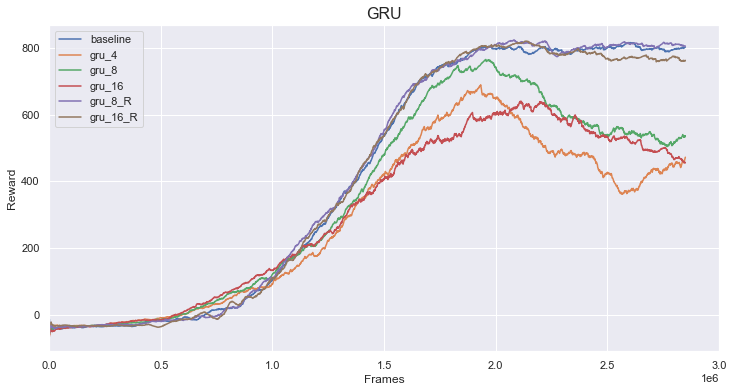

In [5]:
alpha = 0.01
gru_dfs = read_and_process_dfs(gru_data_paths, alpha=alpha)
plot_model_training(gru_dfs, 'GRU', add_time=False)

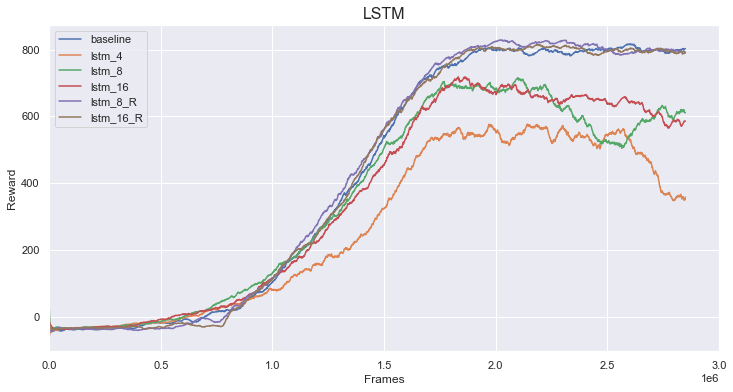

In [6]:
alpha = 0.01
lstm_dfs = read_and_process_dfs(lstm_data_paths, alpha=alpha)
plot_model_training(lstm_dfs, 'LSTM', add_time=False)

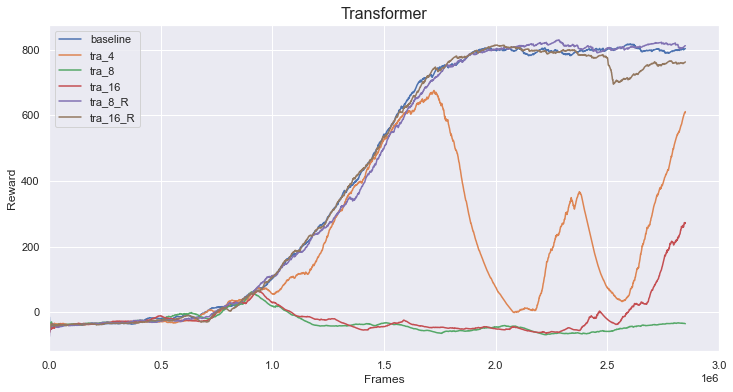

In [7]:
alpha = 0.01
tra_dfs = read_and_process_dfs(tra_data_paths, alpha=alpha)
plot_model_training(tra_dfs, 'Transformer', add_time=False)

# Names & Paths for evaluation runs

In [8]:
base_path = '..\\models\\DriveDQN_simple_fusion2_'
gru_base_path = base_path+'gru_' 
lstm_base_path = base_path+ 'lstm_' 
tra_base_path = base_path+ 'single_act_dec_' 
baseline_path = '..\\models\\' + 'DriveDQN_cnn_1f_Falseres'
variations = ['4f_Falseres', '8f_Falseres', '16f_Falseres', '8f_Trueres', '16f_Trueres']
gru_data_paths =  [gru_base_path+variation for variation in variations]
lstm_data_paths =  [lstm_base_path+variation for variation in variations] 
tra_data_paths =  [tra_base_path+variation for variation in variations] 
all_paths = [baseline_path] + gru_data_paths + lstm_data_paths + tra_data_paths
models = {}
models_to_run = {}
for path in all_paths:
    if os.path.exists(path):
        print(path, 'EXISTS')
        model_name = path.split('\\')[-1]
        models[model_name] = path
        models_to_run[model_name] = [True, []]
    else:
        print(path, 'NOT EXISTS')

..\models\DriveDQN_cnn_1f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_gru_4f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_gru_8f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_gru_16f_Falseres NOT EXISTS
..\models\DriveDQN_simple_fusion2_gru_8f_Trueres EXISTS
..\models\DriveDQN_simple_fusion2_gru_16f_Trueres NOT EXISTS
..\models\DriveDQN_simple_fusion2_lstm_4f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_8f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_16f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_8f_Trueres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_16f_Trueres EXISTS
..\models\DriveDQN_simple_fusion2_single_act_dec_4f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_single_act_dec_8f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_single_act_dec_16f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_single_act_dec_8f_Trueres EXISTS
..\models\DriveDQN_simple_fusion2_single_act_dec_16f_Trueres EXISTS


In [9]:
models, models_to_run

({'DriveDQN_cnn_1f_Falseres': '..\\models\\DriveDQN_cnn_1f_Falseres',
  'DriveDQN_simple_fusion2_gru_4f_Falseres': '..\\models\\DriveDQN_simple_fusion2_gru_4f_Falseres',
  'DriveDQN_simple_fusion2_gru_8f_Falseres': '..\\models\\DriveDQN_simple_fusion2_gru_8f_Falseres',
  'DriveDQN_simple_fusion2_gru_8f_Trueres': '..\\models\\DriveDQN_simple_fusion2_gru_8f_Trueres',
  'DriveDQN_simple_fusion2_lstm_4f_Falseres': '..\\models\\DriveDQN_simple_fusion2_lstm_4f_Falseres',
  'DriveDQN_simple_fusion2_lstm_8f_Falseres': '..\\models\\DriveDQN_simple_fusion2_lstm_8f_Falseres',
  'DriveDQN_simple_fusion2_lstm_16f_Falseres': '..\\models\\DriveDQN_simple_fusion2_lstm_16f_Falseres',
  'DriveDQN_simple_fusion2_lstm_8f_Trueres': '..\\models\\DriveDQN_simple_fusion2_lstm_8f_Trueres',
  'DriveDQN_simple_fusion2_lstm_16f_Trueres': '..\\models\\DriveDQN_simple_fusion2_lstm_16f_Trueres',
  'DriveDQN_simple_fusion2_single_act_dec_4f_Falseres': '..\\models\\DriveDQN_simple_fusion2_single_act_dec_4f_Falseres',


In [10]:
needs_to_run = {
                # 'DriveDQN_cnn_1f_Falseres': [True, None],
                # 'DriveDQN_simple_fusion2_gru_4f_Falseres': [True, [1900, 2000, 2100, 2900]],
                # 'DriveDQN_simple_fusion2_gru_8f_Falseres': [True, [1900, 2000, 2100, 2900]],
                # 'DriveDQN_simple_fusion2_gru_16f_Falseres': [True, [2000, 2100, 2200, 2900]],
                # 'DriveDQN_simple_fusion2_gru_8f_Trueres': [True, [2700, 2800, 2900]],
                # 'DriveDQN_simple_fusion2_gru_16f_Trueres': [True, [2700, 2800, 2900]],
                # 'DriveDQN_simple_fusion2_lstm_4f_Falseres': [True, [2200,2300,2400, 2900]],
                # 'DriveDQN_simple_fusion2_lstm_8f_Falseres': [True, [1900, 2000, 2100, 2900]],
                # 'DriveDQN_simple_fusion2_lstm_16f_Falseres': [True, [1800, 1900, 2000, 2900]],
                # 'DriveDQN_simple_fusion2_lstm_16f_Trueres': [True, [2700, 2800, 2900]],
                # 'DriveDQN_simple_fusion2_lstm_8f_Trueres': [True, [2700, 2800, 2900]],
                # 'DriveDQN_simple_fusion2_single_act_dec_4f_Falseres': [True, [1600,1700,1800,2900]],
                # 'DriveDQN_simple_fusion2_single_act_dec_8f_Falseres': [True, [800,900,2900]],
                # 'DriveDQN_simple_fusion2_single_act_dec_16f_Falseres': [True, [2700,2800,2900]],
                # 'DriveDQN_simple_fusion2_single_act_dec_8f_Trueres': [True, [2300,2400,2500,2900]],
                'DriveDQN_simple_fusion2_single_act_dec_16f_Trueres': [True, [1900,2000,2100,2900]],
                }
needs_to_run, len(needs_to_run.keys())

({'DriveDQN_simple_fusion2_single_act_dec_16f_Trueres': [True,
   [1900, 2000, 2100, 2900]]},
 1)

# Test run stats

In [11]:
to_test_run_path = lambda p: os.path.join('test_runs', p.split('\\')[-1]+'.csv')
stats_paths = [to_test_run_path(p) for p in all_paths]
dfs = []
for s_path in stats_paths:
    if os.path.exists(s_path):
        name = s_path.split('\\')[-1][:-4]
        model_id, mean, std = pd.read_csv(s_path).sort_values('mean reward', ascending=False)[:1].to_numpy()[0]
        dfs.append(pd.DataFrame({'model_id':model_id, 'mean reward': mean, 'std': std}, index=[name]))
    else:
        print(s_path, 'NOT EXISTS')
test_stats_best_df = pd.concat(dfs)
test_stats_best_df.sort_values('mean reward', ascending=False)#.to_csv('best_checkpoints.csv')

test_runs\DriveDQN_simple_fusion2_single_act_dec_16f_Falseres.csv NOT EXISTS


,model_id,mean reward,std
DriveDQN_simple_fusion2_lstm_16f_Falseres,1900.0,856.957435,92.094632
DriveDQN_simple_fusion2_gru_8f_Falseres,1900.0,853.162036,103.084108
DriveDQN_simple_fusion2_single_act_dec_8f_Trueres,2400.0,842.839393,29.298962
DriveDQN_simple_fusion2_gru_8f_Trueres,2700.0,838.526240,83.879537
DriveDQN_simple_fusion2_single_act_dec_16f_Trueres,2100.0,832.341913,46.425006
DriveDQN_simple_fusion2_gru_16f_Trueres,2700.0,822.765743,30.958567
DriveDQN_simple_fusion2_lstm_16f_Trueres,2900.0,811.954058,86.134433
DriveDQN_cnn_1f_Falseres,None,796.043647,101.606672
DriveDQN_simple_fusion2_gru_16f_Falseres,2100.0,780.004852,202.091898
DriveDQN_simple_fusion2_lstm_8f_Falseres,2000.0,775.572334,192.797476
